In [1]:
import pandas as pd

In [2]:
test_data=pd.read_csv('test.csv')
train_data=pd.read_csv('train.csV')

In [3]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
from datetime import datetime
train_data['date']  = train_data.datetime.apply(lambda x: x.split()[0])
train_data['hour'] = train_data.datetime.apply(lambda x: x.split()[1].split(':')[0])
train_data['weekday'] = train_data.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').weekday())
train_data['month'] = train_data.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').month)

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


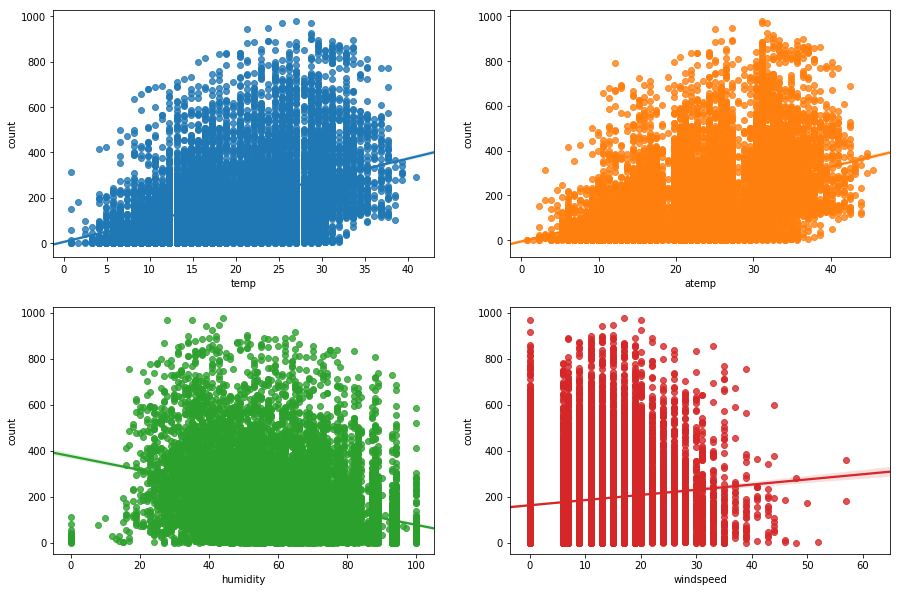

In [6]:
%matplotlib inline
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(15,10)
sns.regplot(data=train_data,x='temp',y='count',ax=axes[0][0])
sns.regplot(data=train_data,x='atemp',y='count',ax=axes[0][1])
sns.regplot(data=train_data,x='humidity',y='count',ax=axes[1][0])
sns.regplot(data=train_data,x='windspeed',y='count',ax=axes[1][1])
plt.show()

In [7]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,5,1


In [8]:
X_Train=train_data.drop(columns=['datetime','count','date','casual','registered'], axis=1)
Y_Train=train_data['count']

In [9]:
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression()
linear_model.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
Predictors=X_Train.columns

coef=pd.Series(linear_model.coef_,Predictors).sort_values()

print(coef)

season        -8.856648
weather       -2.514771
humidity      -2.277261
windspeed      0.379722
weekday        0.851804
holiday        1.034064
temp           2.169889
workingday     2.848279
atemp          4.502400
hour           7.555808
month         10.222108
dtype: float64


In [11]:
linear_model.score(X_Train, Y_Train)

0.3377043676092094

In [12]:
test_data['date']  = test_data.datetime.apply(lambda x: x.split()[0])
test_data['hour'] = test_data.datetime.apply(lambda x: x.split()[1].split(':')[0])
test_data['weekday'] = test_data.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').weekday())
test_data['month'] = test_data.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').month)

In [13]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011-01-20,00,3,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,01,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,02,3,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,03,3,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,04,3,1


In [14]:
X_Test=test_data.drop(columns=['datetime','date'], axis=1)

In [15]:
import numpy as np
def rmsle(prediction, actual):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in prediction]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in actual]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))


In [16]:
prediction=linear_model.predict(X_Train)
i = 0
for v in prediction:
    if prediction[i] < 0:
        prediction[i] = 0
    i = i + 1


RMSLE:  1.2728478947230242


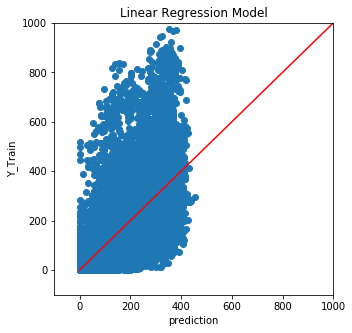

In [17]:
plt.figure(figsize=(5, 5))
plt.scatter(prediction, Y_Train)
plt.plot( [0,1000],[0,1000], color='red')
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.xlabel('prediction')
plt.ylabel('Y_Train')
plt.title('Linear Regression Model')

print("RMSLE: ", rmsle(prediction, Y_Train))


In [19]:
from sklearn.ensemble import GradientBoostingRegressor

params={'n_estimators':500, 'max_depth': 6,'min_samples_split': 2,
        'learning_rate': 0.01, 'loss':'ls'}

gbr_model=GradientBoostingRegressor(**params)
gbr_model.fit(X_Train, Y_Train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [20]:
gbr_model.score(X_Train, Y_Train)

0.8838696000751992

In [21]:
prediction=gbr_model.predict(X_Train)
i = 0
for v in prediction:
    if prediction[i] < 0:
        prediction[i] = 0
    i = i + 1


RMSLE:  0.42248436553815744


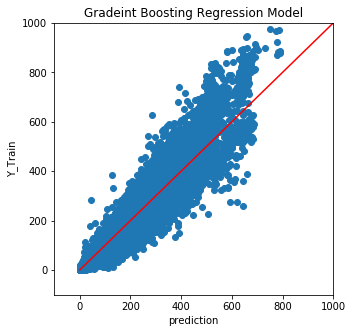

In [22]:
plt.figure(figsize=(5, 5))
plt.scatter(prediction, Y_Train)
plt.plot( [0,1000],[0,1000], color='red')
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.xlabel('prediction')
plt.ylabel('Y_Train')
plt.title('Gradeint Boosting Regression Model')

print("RMSLE: ", rmsle(prediction, Y_Train))


In [24]:
from sklearn.model_selection import GridSearchCV

num_estimators=[100, 200, 500]
learn_rates=[0.01, 0.02, 0.05, 0.1]
max_depths= [4,6,8]

param_grid={'n_estimators': num_estimators,
            'learning_rate': learn_rates,
           'max_depth': max_depths}

grid_search=GridSearchCV(GradientBoostingRegressor(min_samples_split=2, loss='ls'),
                        param_grid, cv=3, return_train_score=True)

grid_search.fit(X_Train, Y_Train)

grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 200}

In [25]:
params={'n_estimators':200, 'max_depth': 8,'min_samples_split': 2,
        'learning_rate': 0.01, 'loss':'ls'}

gbr_model=GradientBoostingRegressor(**params)
gbr_model.fit(X_Train, Y_Train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [26]:
gbr_model.score(X_Train, Y_Train)

0.8557841466198312

In [27]:
prediction=gbr_model.predict(X_Train)
i = 0
for v in prediction:
    if prediction[i] < 0:
        prediction[i] = 0
    i = i + 1


RMSLE:  0.7462701818253064


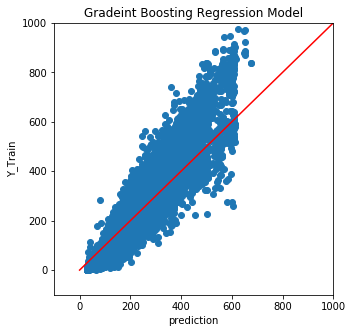

In [28]:
plt.figure(figsize=(5, 5))
plt.scatter(prediction, Y_Train)
plt.plot( [0,1000],[0,1000], color='red')
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.xlabel('prediction')
plt.ylabel('Y_Train')
plt.title('Gradeint Boosting Regression Model')

print("RMSLE: ", rmsle(prediction, Y_Train))
